<a href="https://colab.research.google.com/github/alouwyck/vives-deep-learning/blob/main/topic15/7_PyTorch_Save_load_run_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

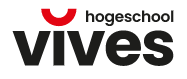<br>


**DEEP LEARNING**<br>
Academiejaar 2022-2023<br>
Andy Louwyck

---



---



**PYTORCH TUTORIAL**

Deze tutorial is overgenomen van de PyTorch website:

https://pytorch.org/tutorials/beginner/basics/saveloadrun_tutorial.html

# Save and Load the Model

In this section we will look at how to persist model state with saving, loading and running model predictions.


In [1]:
%matplotlib inline

In [2]:
import torch
import torchvision.models as models

## Saving and Loading Model Weights
PyTorch models store the learned parameters in an internal
state dictionary, called ``state_dict``. These can be persisted via the ``torch.save``
method:



In [3]:
model = models.vgg16(pretrained=True)
filename = 'model_weights.pth'
torch.save(model.state_dict(), filename)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 85.0MB/s]


In [4]:
import os
os.path.exists(filename)

True

To load model weights, you need to create an instance of the same model first, and then load the parameters
using ``load_state_dict()`` method.



In [5]:
model = models.vgg16() # we do not specify pretrained=True, i.e. do not load default weights
model.load_state_dict(torch.load(filename))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

**Note**

Be sure to call ``model.eval()`` method before inferencing to set the dropout and batch normalization layers to evaluation mode. Failing to do this will yield inconsistent inference results.



## Saving and Loading Models with Shapes
When loading model weights, we needed to instantiate the model class first, because the class
defines the structure of a network. We might want to save the structure of this class together with
the model, in which case we can pass ``model`` (and not ``model.state_dict()``) to the saving function:



```python
torch.save(model, 'model.pth')
```

We can then load the model like this:



```python
model = torch.load('model.pth')
```

**Note**

This approach uses Python [pickle](https://docs.python.org/3/library/pickle.html) module when serializing the model, thus it relies on the actual class definition to be available when loading the model.



---

## Related Tutorials
[Saving and Loading a General Checkpoint in PyTorch](https://pytorch.org/tutorials/recipes/recipes/saving_and_loading_a_general_checkpoint.html)



---